In [1]:
#loading of the data set
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
from scripts import project_function
my_path = os.path.abspath(os.path.dirname('course-project-solo_201'))
path = os.path.join(my_path, "../data/raw/whitewine.xlsx")
df = project_function.loadWine(path)
print(df.isnull().any())
#shows so no null values





fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


In [7]:
#EDA Start
#decribes details about all the columns 
df.describe()




fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3961.000000       3961.000000  3961.000000     3961.000000   
mean        6.839346          0.280538     0.334332        5.914819   
std         0.866860          0.103437     0.122446        4.861646   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.330000     0.390000        8.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3961.000000          3961.000000           3961.000000  3961.000000   
mean      0.045905            34.889169            137.193512     0.993790   
std       0.023103            17.210021             43.129065     0.002905   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.035000            23.000000            106.000000     0.991620   
50%       0.042000            33.000000            133.000000     0.993500   
75%       0.050000            45.000000            166.000000     0.995710   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  3961.000000  3961.000000  3961.000000  3961.000000  
mean      3.195458     0.490351    10.589358     5.854835  
std       0.151546     0.113523     1.217076     0.890683  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.480000    10.400000     6.000000  
75%       3.290000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

<AxesSubplot:>

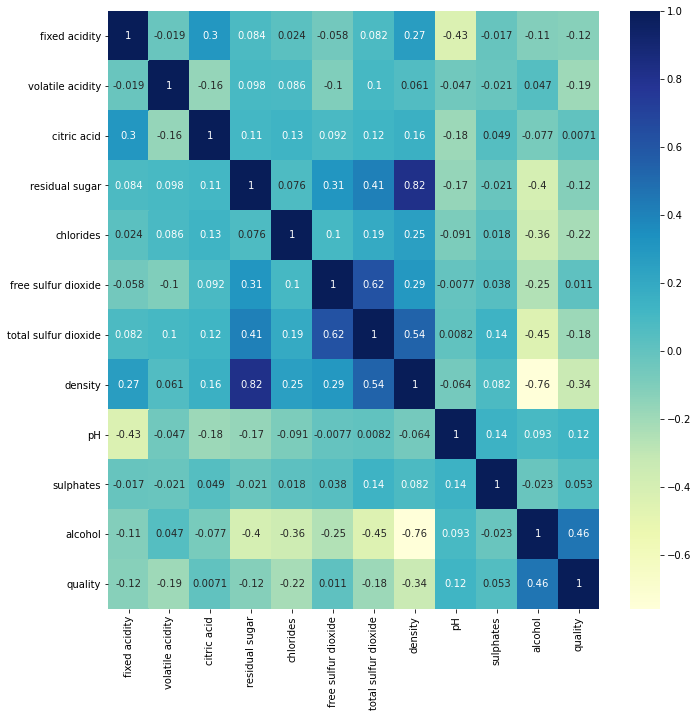

In [5]:
#heat map to see the correlation between each type

plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")


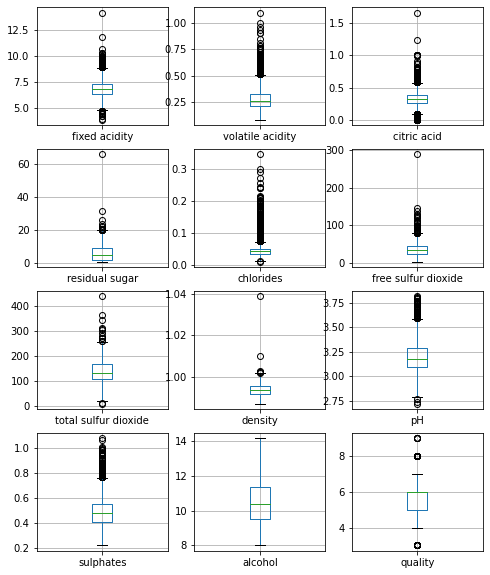

In [6]:
#finding any outliers using box plot
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide'
           , 'total sulfur dioxide', 'density', 'pH','sulphates','alcohol', 'quality']

plt.figure(figsize=(8,10))
for i in range(0, 12):
    plt.subplot(4,3,i+1)
    df.boxplot(columns[i])




#The boxplot below shows us there our many outliers in our data not as much in the citric acid, quality and alcohol columns,
#however this can cause a negative effect on analysis so we must remove them



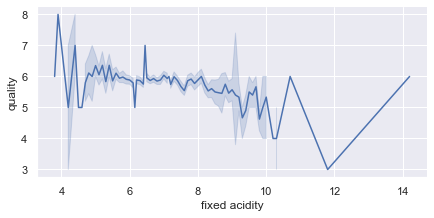

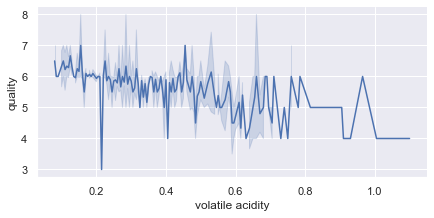

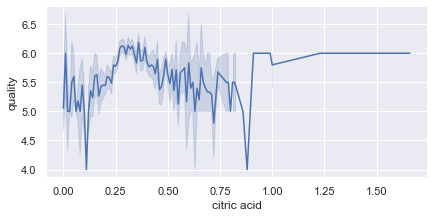

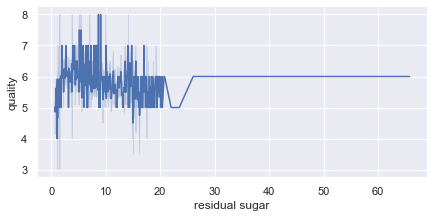

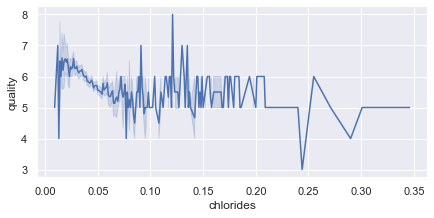

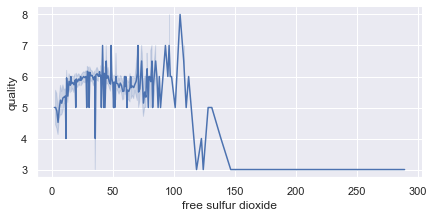

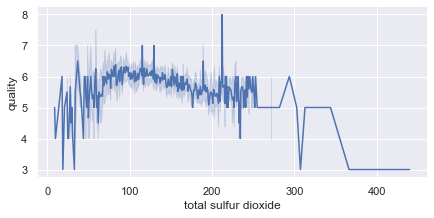

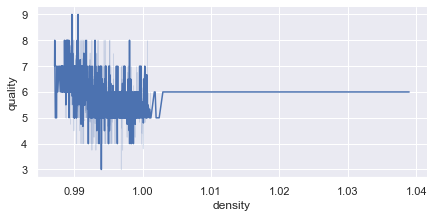

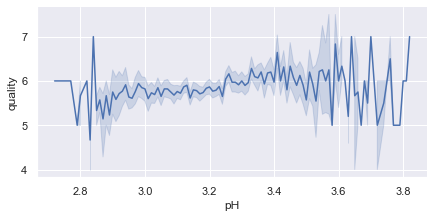

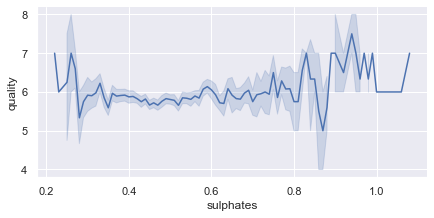

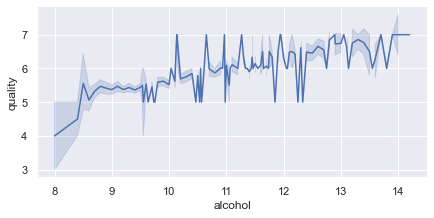

In [7]:
#before removing outliers
columnss = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide'
           , 'total sulfur dioxide', 'density', 'pH','sulphates','alcohol']

for i in range(0, 11):
    sns.set()
    sns.relplot(data = df, x=columnss[i],y='quality', kind='line', height = 3, aspect=2)


In [3]:
#removing outliers 

dfout = project_function.removeOut(df)


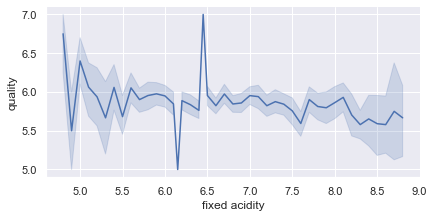

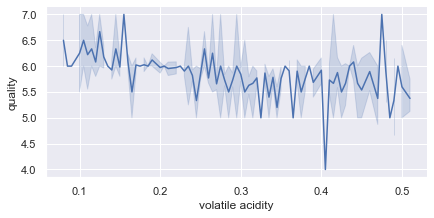

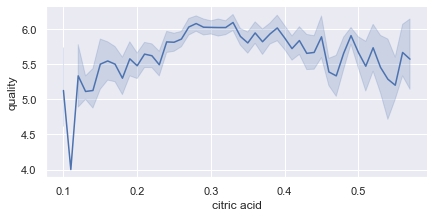

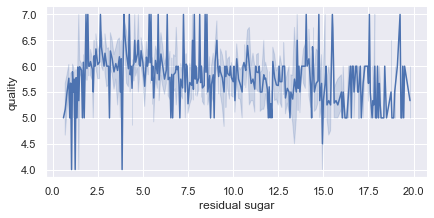

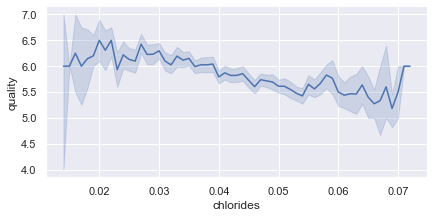

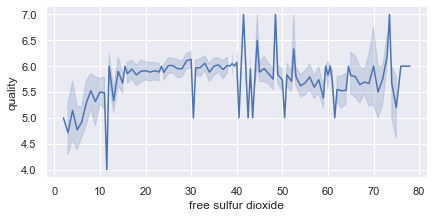

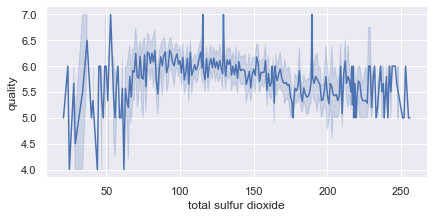

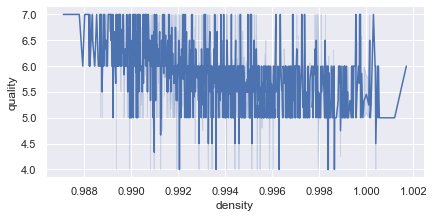

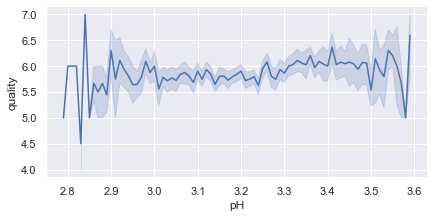

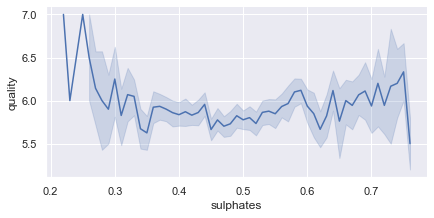

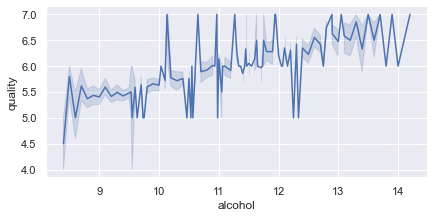

In [9]:
#replot after removing outliers
#comparing the two replots you can see how much better and accurate the plots look after removing the outliers

for i in range(0, 11):
    sns.set()
    sns.relplot(data = dfout, x=columnss[i],y='quality', kind='line', height = 3, aspect=2)

### Relplot findings
**helps see that this model is linear**

**residual sugar** plot shows many spikes in quality this due to the residual sugar being depended on the acidity(positive correlation).as wine tastes good when it has a great balance between sweet and sour(acidity)

**citric acid** - the replot shows us that quality is low when citric acid level are also low this due to citric acid being able
#prevent certain types of bacteria growth. citric acid also adds a fresh taste, however too much can end up runing the taste e.g low quality.

**the two sulfur dioxide replots** - is somewhat even throughout the amounts, however since sulfur dioxide is used to kill off
bacteria growth and yeast too little can be linked to low quality this shown in the free sulfur dioxide replot.

**sulphates** - helps perserve the wine and can effect the taste by making it more sharp. low amounts of sulphates have a higher quality due to higher amounts being able to change the color and taste of the wine. this is shown in the replot.

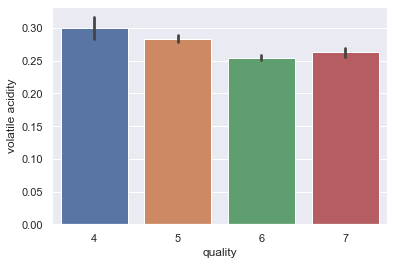

In [10]:
sns.barplot(x='quality', y='volatile acidity', data=dfout)
plt.show()

#an increase in volatile acidity is associated with a decrease in quality due to  a higher level indicating wine spoilage and 
#it can give off a bad smell

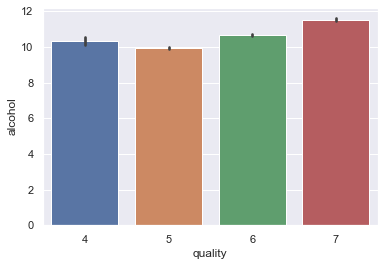

In [11]:

sns.barplot(x='quality', y='alcohol', data=dfout)
plt.show()

#the barplot also the relplot help show that a higher content of alcohol leads to a higher quality possibly due to the tasters 
#perfering wine that makes feel more buzzed 

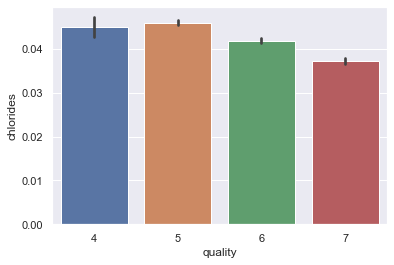

In [12]:
sns.barplot(x='quality', y='chlorides', data=dfout)
plt.show()
#lower levels of chlorides have a higher quality because high level of chlorides can give the wine too much of a salty taste

<AxesSubplot:>

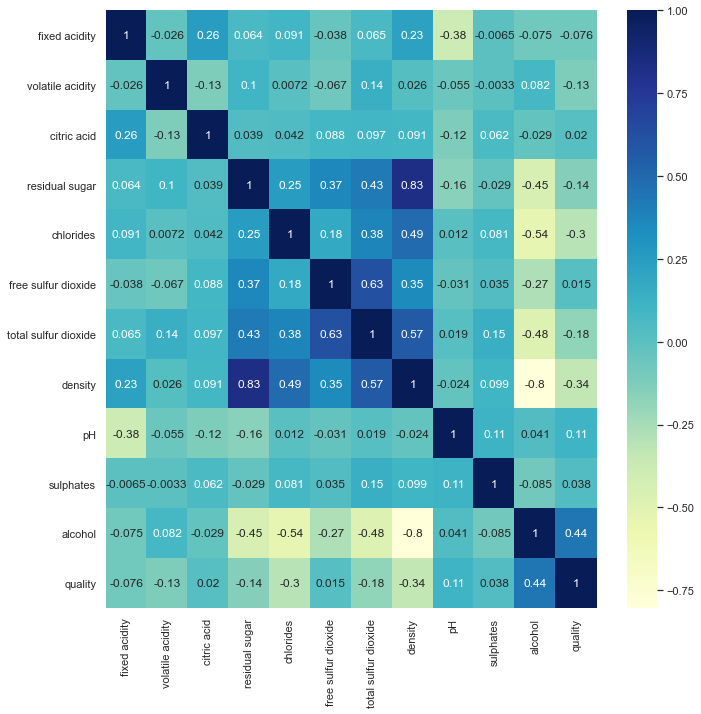

In [13]:
#looking at correlation with outliners removed
plt.figure(figsize=(11,11))
sns.heatmap(dfout.corr(), annot = True, cmap="YlGnBu")

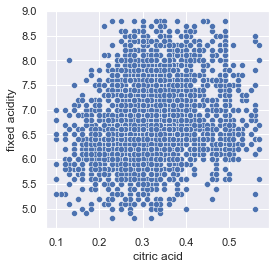

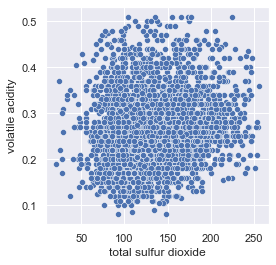

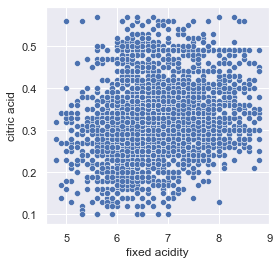

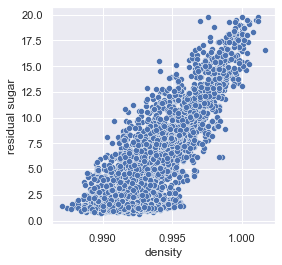

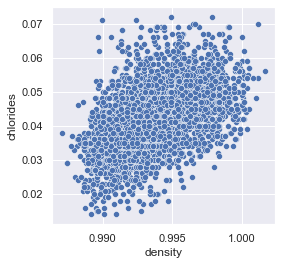

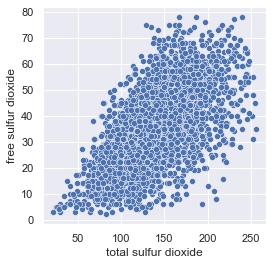

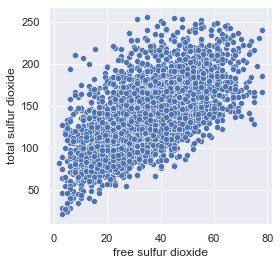

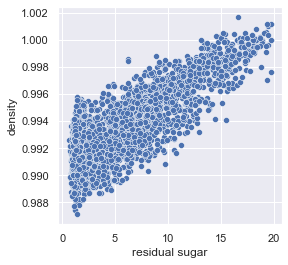

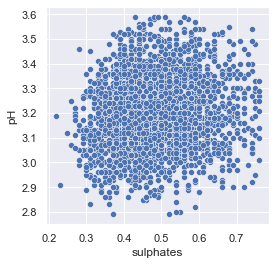

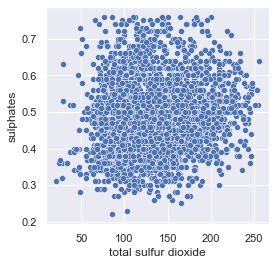

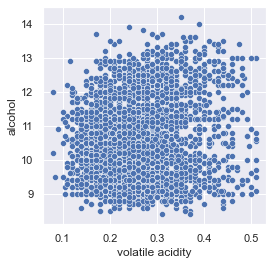

In [5]:
#Exploring relationships inbetween variables using the above heatmap for correlation reference
#I'm going to be using the highest correlation value between each element to compare
#Scatterplot for better visualization


fixed = ['citric acid']
volatile = ['total sulfur dioxide']
citric = ['fixed acidity']
residual = ['density']
chlorides = ['density']
free_sulfur = ['total sulfur dioxide']
total_sulfur = ['free sulfur dioxide']
density = ['residual sugar']
pH = ['sulphates']
sulphates = ['total sulfur dioxide']
alcohol = ['volatile acidity'] 
for i in range(0, 10):
    if (i < len(fixed)):
        plt.figure(figsize=(4,4))
        sns.set()
        sns.scatterplot(data = dfout, x=fixed[i], y='fixed acidity')
        plt.show()
    if (i < len(volatile)):
        plt.figure(figsize=(4,4))
        sns.set()
        sns.scatterplot(data = dfout, x=volatile[i], y='volatile acidity')
        plt.show()
    if (i < len(citric)):
        plt.figure(figsize=(4,4))
        sns.set()
        sns.scatterplot(data = dfout, x=citric[i], y='citric acid')
        plt.show()
    if (i < len(residual)):
        plt.figure(figsize=(4,4))
        sns.set()
        sns.scatterplot(data = dfout, x=residual[i], y='residual sugar')
        plt.show()
    if (i < len(chlorides)):
        plt.figure(figsize=(4,4))
        sns.set()
        sns.scatterplot(data = dfout, x=chlorides[i], y='chlorides')
        plt.show()
    if (i < len(free_sulfur)):
        plt.figure(figsize=(4,4))
        sns.set()
        sns.scatterplot(data = dfout, x=free_sulfur[i], y='free sulfur dioxide')
        plt.show()
    if (i < len(total_sulfur)):
        plt.figure(figsize=(4,4))
        sns.set()
        sns.scatterplot(data = dfout, x=total_sulfur[i], y='total sulfur dioxide')
        plt.show()
    if (i < len(density)):
        plt.figure(figsize=(4,4))
        sns.set()
        sns.scatterplot(data = dfout, x=density[i], y='density')
        plt.show()
    if (i < len(pH)):
        plt.figure(figsize=(4,4))
        sns.set()
        sns.scatterplot(data = dfout, x=pH[i], y='pH')
        plt.show()
    if (i < len(sulphates)):
        plt.figure(figsize=(4,4))
        sns.set()
        sns.scatterplot(data = dfout, x=sulphates[i], y='sulphates')
        plt.show()
    if (i < len(alcohol)):
        plt.figure(figsize=(4,4))
        sns.set()
        sns.scatterplot(data = dfout, x=alcohol[i], y='alcohol')
        plt.show()
    
    
   
   



In [16]:
#using a combination of two elements that are the most positive correlated with eachother
new_df = project_function.newDF(dfout)
new_df = new_df.drop(columns=['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
                       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'citric acid'])
new_df

quality  fixed_citric  volatile_totalSulfur  residual_density  \
0           6         3.320                66.150          1.297000   
1           6         4.250                48.640          3.947550   
2           6         3.760                93.115          4.747800   
3           6         3.180                68.160          3.997450   
4           6         4.265                64.610          1.246900   
...       ...           ...                   ...               ...   
3126        6         3.245                46.105          1.295570   
3127        5         3.480                84.160          4.497450   
3128        6         3.345                55.620          1.096270   
3129        7         2.900                55.145          1.044345   
3130        6         3.190                49.105          0.894705   

      chlorides_density  freeSulfur_totalSulfur  pH_sulphates  \
0              0.521500                    73.0         1.895   
1              0.522550                    63.5         1.850   
2              0.526800                   116.5         1.795   
3              0.519950                    83.0         1.825   
4              0.518900                    78.5         1.835   
...                 ...                     ...           ...   
3126           0.515070                    58.0         1.885   
3127           0.520950                   112.5         1.805   
3128           0.516770                    70.5         1.725   
3129           0.505345                    65.0         1.860   
3130           0.504705                    60.0         1.790   

      sulphates_totalSulfur  alcohol_volatile  
0                    66.245             4.900  
1                    48.720             5.190  
2                    93.200             5.065  
3                    68.235             4.960  
4                    64.725             5.610  
...                     ...               ...  
3126                 46.250             5.705  
3127                 84.230             4.960  
3128                 55.730             4.820  
3129                 55.190             6.545  
3130                 49.160             6.005  

[3131 rows x 9 columns]

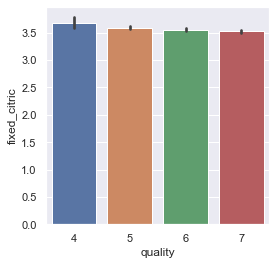

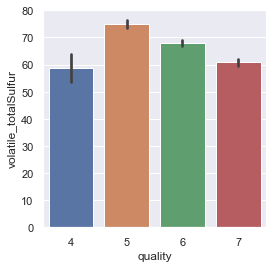

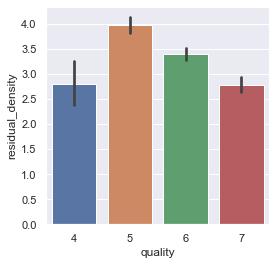

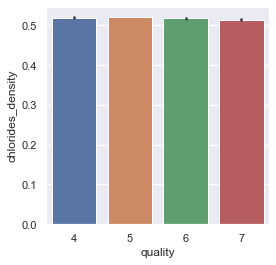

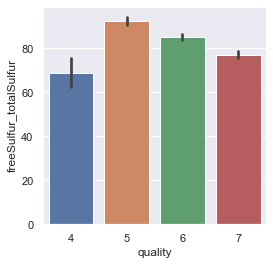

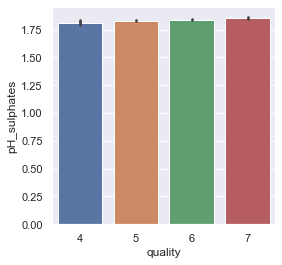

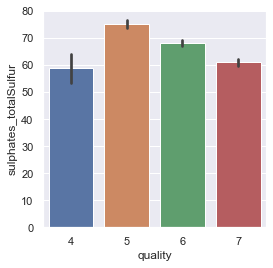

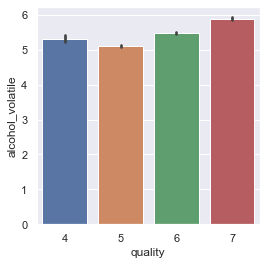

In [12]:
newcolumns = ['fixed_citric', 'volatile_totalSulfur', 'residual_density', 'chlorides_density', 'freeSulfur_totalSulfur'
            ,'pH_sulphates', 'sulphates_totalSulfur', 'alcohol_volatile']

for i in range(0, len(newcolumns)):
        plt.figure(figsize=(4,4))
        sns.set()
        sns.barplot(x='quality', y=newcolumns[i], data=new_df)
        plt.show()

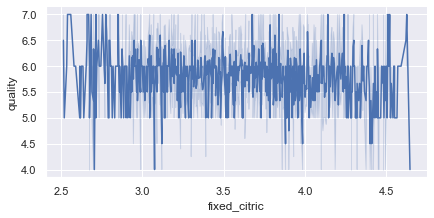

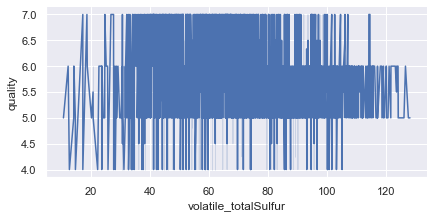

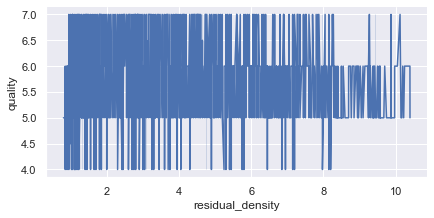

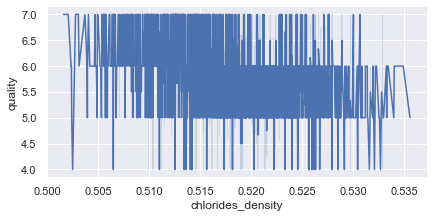

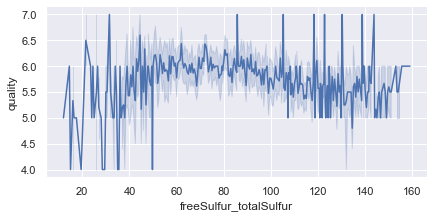

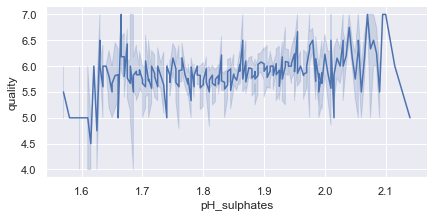

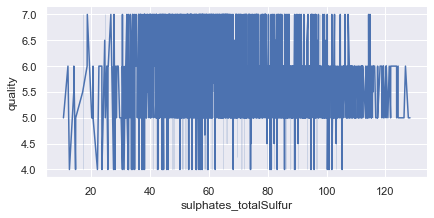

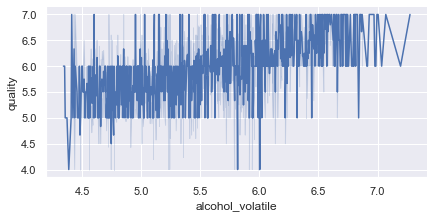

In [13]:
for i in range(0, len(newcolumns)):
    sns.set()
    sns.relplot(data = new_df, x=newcolumns[i],y='quality', kind='line', height = 3, aspect=2)

## Revised Research Questions
**Q1. What elements play a big role in influencing the taste(quality) of wine?**

**Q2. What highest correlation combination between elements has the most effect on the quality of wine?**

### Findings
>**Q1** - According to our analysis the element that had the biggest affect on taste was alcohol, which is very interesting.
Alcohol had the biggest positive correlation with quality because most people who consume wine do it for the effects of alcohol, so wine with a low alcohol content wouldn't be of interest to most people. *Sulphates*, *Sulfhur dioxide* and *citric acid* all have an affect on perserving the quality of wine, but *Sulphates* and *Citric acid* affect taste as well. The relplot shows that a low amount *Sulphates* leads to a higher quality and for *Citric acid* the amount needs to be in a specific range not too high or low to increase the quality. *Volatile acidity* indicates if wine has gone bad, it is negatively correlated with quality so a low amount leads to higher quality. Lastly, *chlorides* also have a big affect on quality as expressed on the barplot and replot low chloride levels steer towards a higher quality and high chloride levels tend to do the opposite.


>**Q2** - from the **bar graph** and **relplot** we found that the combination of *volatile acidity* and *alcohol* has the best effect on the quality wine. The higher amount of the **alcohol_volatile** combination the wine contained resulted in a higher quality. We also found that for **free and total sulfur dioxide** and **ph_density** combination there are certain ranges were the quality would be the highest. Considering if you add too much or too little of a certain element it can throw off the taste. 